# Fraud Detection for Healthcare Insurance

### *Problem:* 
*  How can we predict healthcare fraud using machine learning?
* Healthcare insurance fraud leads to billions in losses annually.
* *Fraud Types*:
    * Billing for services not provided.
    * Inflated bills or duplicate claims
    * Flasified patient records
    * Unnecessary procedure or prescriptions.


### *Solution*:
* Build a system using anomaly detection (e.g., DBSCAN, Isolation Forest) and machine learning(e.g, XGB) to identify fraudulent claims and abnormal patterns.

### *Features*:
* Automatically flag suspicious activities for review.
* Minimize false positive to avoid unnecessary investigations.
* Visualize claim trends and deviations.
* Ensure compliance with data privacy laws.


### Identify Metrics:
* Accuracy, precision, Recall, F1 Score for the fraud detecion model.
* Reduction in investigation costs and fraus losses.



# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from src.utlis import generate_synthetic_data, add_missing_values_denied_claims


## Synthetic data used here to generate the dataset for this problem

In [2]:
# synthetic data generation function
data = generate_synthetic_data(5000)


In [3]:

#display head of data
data.head(2)

,Claim ID,Claim Amount,Procedure Code,Service Date,Claim Status,Patient ID,Age,Gender,Location,Medical History,...,Provider ID,Specialization,Provider Location,Reputation Score,Payment Method,Time Between Claims,Cost Deviation,Suspicious Timing,Duplicate Claims,Fraudulent
0,cef37d58,59615.656143,99282,2024-01-24,Approved,20882,66,Male,South Patrickview,Hypertension,...,60441,Emergency Medicine,South Amandaborough,3.86,Debit Card,64,2.592744,0,0,0
1,11a7a4d8,10514.185793,11042,2020-03-04,Under Review,98919,62,Male,South Christinaville,None,...,17172,Cardiology,Lake Jennifer,2.44,Cash,20,2.038836,0,0,0


## Adding '_' in columns name to

In [4]:

data.columns

Index(['Claim ID', 'Claim Amount', 'Procedure Code', 'Service Date',
       'Claim Status', 'Patient ID', 'Age', 'Gender', 'Location',
       'Medical History', 'Insurance Plan', 'Provider ID', 'Specialization',
       'Provider Location', 'Reputation Score', 'Payment Method',
       'Time Between Claims', 'Cost Deviation', 'Suspicious Timing',
       'Duplicate Claims', 'Fraudulent'],
      dtype='object')

In [5]:
data.columns = [col.replace(' ', '_') for col in data.columns]
data.columns

Index(['Claim_ID', 'Claim_Amount', 'Procedure_Code', 'Service_Date',
       'Claim_Status', 'Patient_ID', 'Age', 'Gender', 'Location',
       'Medical_History', 'Insurance_Plan', 'Provider_ID', 'Specialization',
       'Provider_Location', 'Reputation_Score', 'Payment_Method',
       'Time_Between_Claims', 'Cost_Deviation', 'Suspicious_Timing',
       'Duplicate_Claims', 'Fraudulent'],
      dtype='object')

In [6]:
# # create missing values in data set

data = add_missing_values_denied_claims(data)
data[data['Claim_Status'] =='Denied'].head()

,Claim_ID,Claim_Amount,Procedure_Code,Service_Date,Claim_Status,Patient_ID,Age,Gender,Location,Medical_History,...,Provider_ID,Specialization,Provider_Location,Reputation_Score,Payment_Method,Time_Between_Claims,Cost_Deviation,Suspicious_Timing,Duplicate_Claims,Fraudulent
2,34dcf268,NaN,99283,2024-01-02,Denied,25694,47,Female,Allenland,Diabetes,...,47939,Orthopedics,West Jason,4.40,Debit Card,340,1.830989,0,0,0
4,6f0bfe8d,NaN,99382,2021-06-02,Denied,23811,78,Male,Myersburgh,None,...,34145,Emergency Medicine,North Alexview,4.40,Credit Card,189,2.798629,0,0,0
5,0e7f62c0,NaN,99282,2024-12-19,Denied,27986,22,Female,North Andreaborough,Diabetes,...,88932,Emergency Medicine,West Alison,3.95,Cash,106,2.360950,0,0,0
6,bc1860de,NaN,43235,2024-09-11,Denied,59414,85,Female,South Frederick,Asthama,...,67091,Orthopedics,South Patriciaberg,1.12,Cash,248,0.979096,0,0,0
8,a0c0d79b,NaN,99282,2020-11-26,Denied,29531,23,Male,North Peter,Diabetes,...,60649,Dermatology,East Jorge,3.18,Debit Card,353,1.659977,0,0,0


In [7]:
# Save the data

data.to_csv("data/fraud_insurance_claim.csv", index=False)
print("Data saved successfully to output_data.csv!")

Data saved successfully to output_data.csv!


## Exploratory Analysis

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Claim_ID             5000 non-null   object 
 1   Claim_Amount         3261 non-null   float64
 2   Procedure_Code       5000 non-null   object 
 3   Service_Date         5000 non-null   object 
 4   Claim_Status         5000 non-null   object 
 5   Patient_ID           5000 non-null   int64  
 6   Age                  5000 non-null   int64  
 7   Gender               5000 non-null   object 
 8   Location             5000 non-null   object 
 9   Medical_History      5000 non-null   object 
 10  Insurance_Plan       5000 non-null   object 
 11  Provider_ID          5000 non-null   int64  
 12  Specialization       5000 non-null   object 
 13  Provider_Location    5000 non-null   object 
 14  Reputation_Score     5000 non-null   float64
 15  Payment_Method       5000 non-null   o

In [9]:
data.describe()

,Claim_Amount,Patient_ID,Age,Provider_ID,Reputation_Score,Time_Between_Claims,Cost_Deviation,Suspicious_Timing,Duplicate_Claims,Fraudulent
count,3261.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,44318.173752,54875.579600,53.957000,54290.157200,3.287454,176.387600,1.986268,0.006000,0.001600,0.006000
std,62017.537754,25902.712596,21.283029,26020.541011,1.173157,110.741118,0.457664,0.077235,0.039972,0.077235
min,1000.000000,10019.000000,1.000000,10015.000000,1.000000,0.000000,0.830576,0.000000,0.000000,0.000000
25%,6678.717538,32321.250000,36.000000,31844.000000,2.277500,80.000000,1.673953,0.000000,0.000000,0.000000
50%,34541.085380,54470.500000,54.000000,53850.000000,3.580000,177.000000,2.010897,0.000000,0.000000,0.000000
75%,67074.121106,77598.750000,72.000000,76519.750000,4.290000,275.000000,2.330198,0.000000,0.000000,0.000000
max,820962.635109,99983.000000,100.000000,99970.000000,5.000000,365.000000,2.979049,1.000000,1.000000,1.000000


In [10]:
# get all categorical variables
cat_col = [col for col in data.columns if data[col].dtype == 'O']
cat_col

['Claim_ID',
 'Procedure_Code',
 'Service_Date',
 'Claim_Status',
 'Gender',
 'Location',
 'Medical_History',
 'Insurance_Plan',
 'Specialization',
 'Provider_Location',
 'Payment_Method']

In [11]:
num_col = [col for col in data.columns if data[col].dtype == 'int']
num_col

['Patient_ID',
 'Age',
 'Provider_ID',
 'Time_Between_Claims',
 'Suspicious_Timing',
 'Duplicate_Claims',
 'Fraudulent']

In [12]:
# check for missing values
print("Missing Values:\n", data.isnull().sum())
print("\n\nFraudulent Claims:\n", data['Fraudulent'].value_counts())

Missing Values:
 Claim_ID                  0
Claim_Amount           1739
Procedure_Code            0
Service_Date              0
Claim_Status              0
Patient_ID                0
Age                       0
Gender                    0
Location                  0
Medical_History           0
Insurance_Plan            0
Provider_ID               0
Specialization            0
Provider_Location         0
Reputation_Score          0
Payment_Method            0
Time_Between_Claims       0
Cost_Deviation            0
Suspicious_Timing         0
Duplicate_Claims          0
Fraudulent                0
dtype: int64


Fraudulent Claims:
 Fraudulent
0    4970
1      30
Name: count, dtype: int64


0 for Non-fraudulent and 1 for Fraudulent

In [13]:
# claim_amount has missing values
claim_ = data.loc[data['Claim_Amount'].isna(), 'Claim_Status']

#fill with zero as the claim is denied hence there will be no claim amount
data['Claim_Amount'] = data['Claim_Amount'].fillna(0)
# data[data['Claim_Amount'].isna()]

data.loc[data['Claim_Amount']==0].head(2)

,Claim_ID,Claim_Amount,Procedure_Code,Service_Date,Claim_Status,Patient_ID,Age,Gender,Location,Medical_History,...,Provider_ID,Specialization,Provider_Location,Reputation_Score,Payment_Method,Time_Between_Claims,Cost_Deviation,Suspicious_Timing,Duplicate_Claims,Fraudulent
2,34dcf268,0.0,99283,2024-01-02,Denied,25694,47,Female,Allenland,Diabetes,...,47939,Orthopedics,West Jason,4.4,Debit Card,340,1.830989,0,0,0
4,6f0bfe8d,0.0,99382,2021-06-02,Denied,23811,78,Male,Myersburgh,None,...,34145,Emergency Medicine,North Alexview,4.4,Credit Card,189,2.798629,0,0,0


In [14]:
#  COnvert serivce date to datetime 

data['Service_Date'] = pd.to_datetime(data['Service_Date'])

In [15]:
# count value sof categorical variables

def check_count_cat(cat_col, data):
    for col in data.columns:
        if col in cat_col:
            print(f'{col}:\n')
            print(data[col].value_counts())

check_count_cat(cat_col,data)

Claim_ID:

Claim_ID
b4820025    1
cef37d58    1
11a7a4d8    1
34dcf268    1
aad703b1    1
           ..
a3beaf22    1
258ff10c    1
d780c129    1
36bbdfe2    1
677fc3ea    1
Name: count, Length: 5000, dtype: int64
Procedure_Code:

Procedure_Code
99283    527
99282    513
99285    507
99284    498
99281    475
93000    189
99383    185
45378    180
43235    177
71020    175
11042    168
11730    164
99385    164
72148    163
99382    162
99381    158
12001    154
12051    153
10060    147
99384    141
Name: count, dtype: int64
Service_Date:

Service_Date
2020-10-26    12
2022-04-27    10
2022-10-21     9
2023-06-07     9
2024-10-16     8
              ..
2024-11-23     1
2020-04-06     1
2023-01-28     1
2021-02-20     1
2023-09-15     1
Name: count, Length: 1721, dtype: int64
Claim_Status:

Claim_Status
Denied          1739
Approved        1648
Under Review    1613
Name: count, dtype: int64
Gender:

Gender
Female    2530
Male      2470
Name: count, dtype: int64
Location:

Location
West

## Explanatory analysis

In [16]:
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


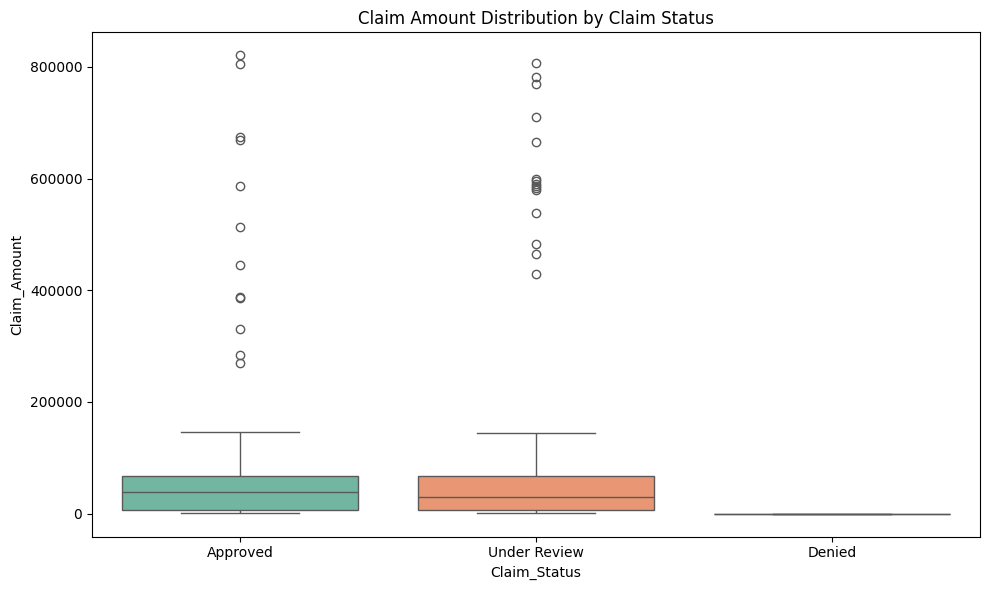

In [17]:
# Boxplot to visualize the distribution of Claim Amount
plt.figure(figsize=(10, 6))
sns.boxplot(x='Claim_Status', y='Claim_Amount', data=data, palette='Set2')
plt.title('Claim Amount Distribution by Claim Status')
plt.tight_layout()
plt.show()

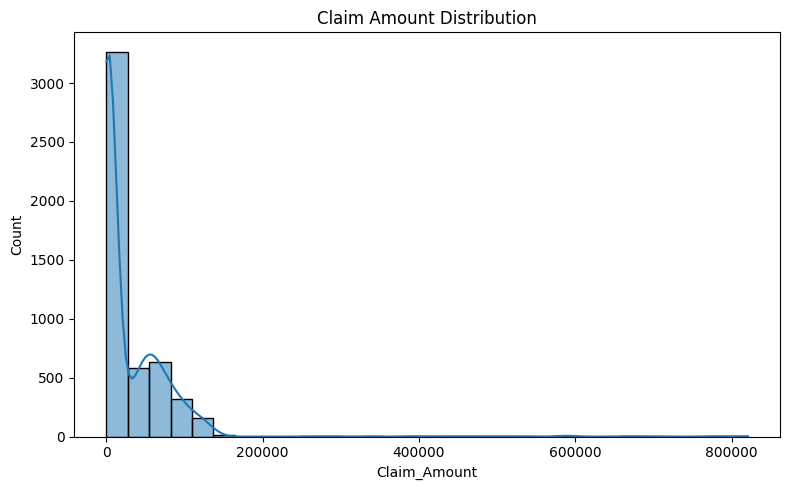

In [18]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Claim_Amount'], bins=30, kde=True)  # kde=True adds the density plot
plt.title('Claim Amount Distribution')
plt.tight_layout()
plt.show()


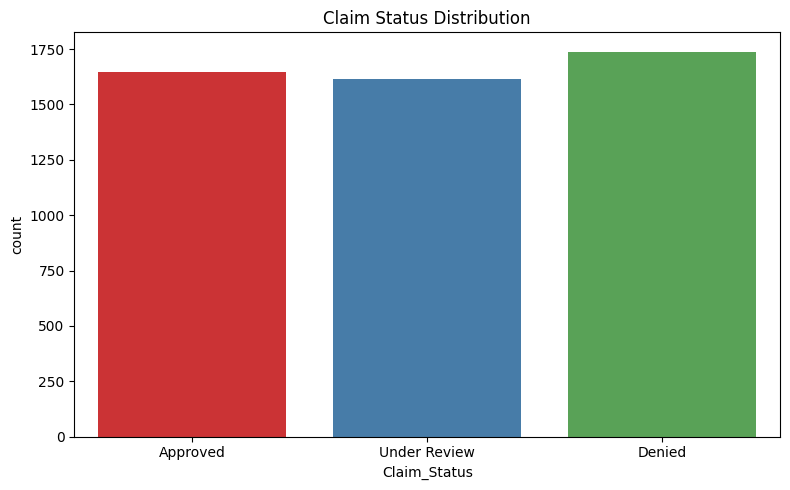

In [19]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Claim_Status', data=data, palette='Set1')
plt.title('Claim Status Distribution')
plt.tight_layout()
plt.show() 

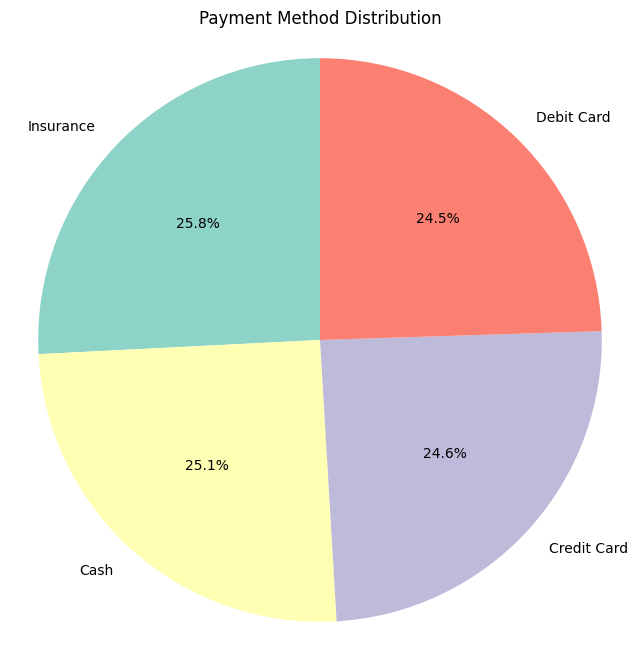

In [20]:
plt.figure(figsize=(8, 8))
payment_method_counts = data['Payment_Method'].value_counts()
plt.pie(payment_method_counts, labels=payment_method_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(payment_method_counts)))
plt.title('Payment Method Distribution')
plt.axis('equal')
plt.show()

# KDE Plot 

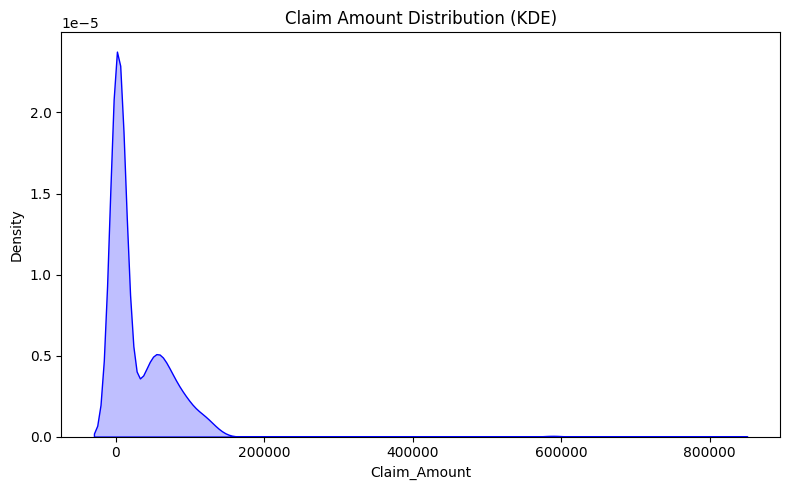

In [21]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data['Claim_Amount'], fill=True, color='blue')
plt.title('Claim Amount Distribution (KDE)')
plt.tight_layout()
plt.show()

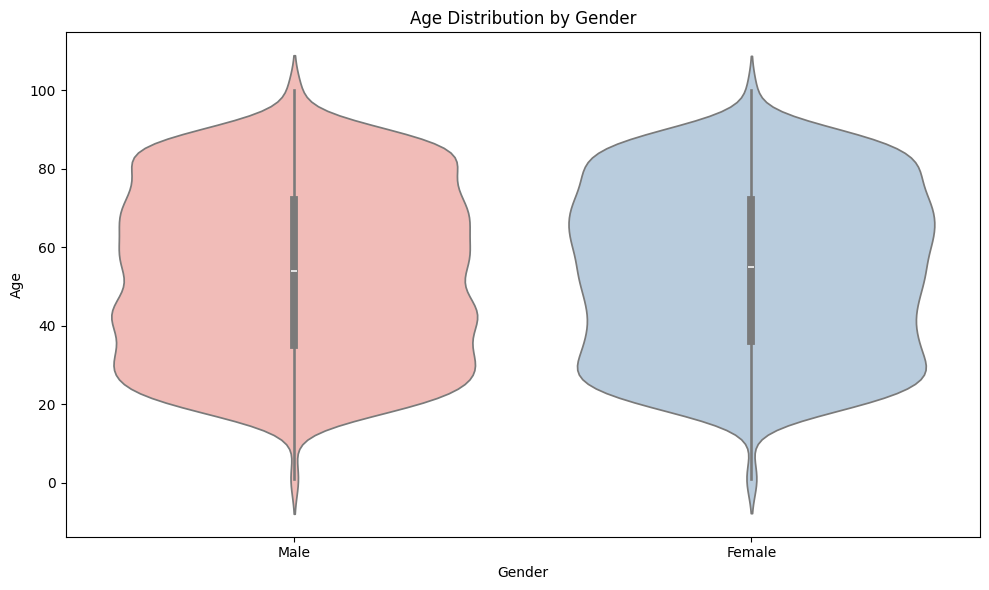

In [22]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender', y='Age', data=data, palette='Pastel1')
plt.title('Age Distribution by Gender')
plt.tight_layout()
plt.show()


# Correlation Heatmap
A heatmap to show correlations between numerical features:

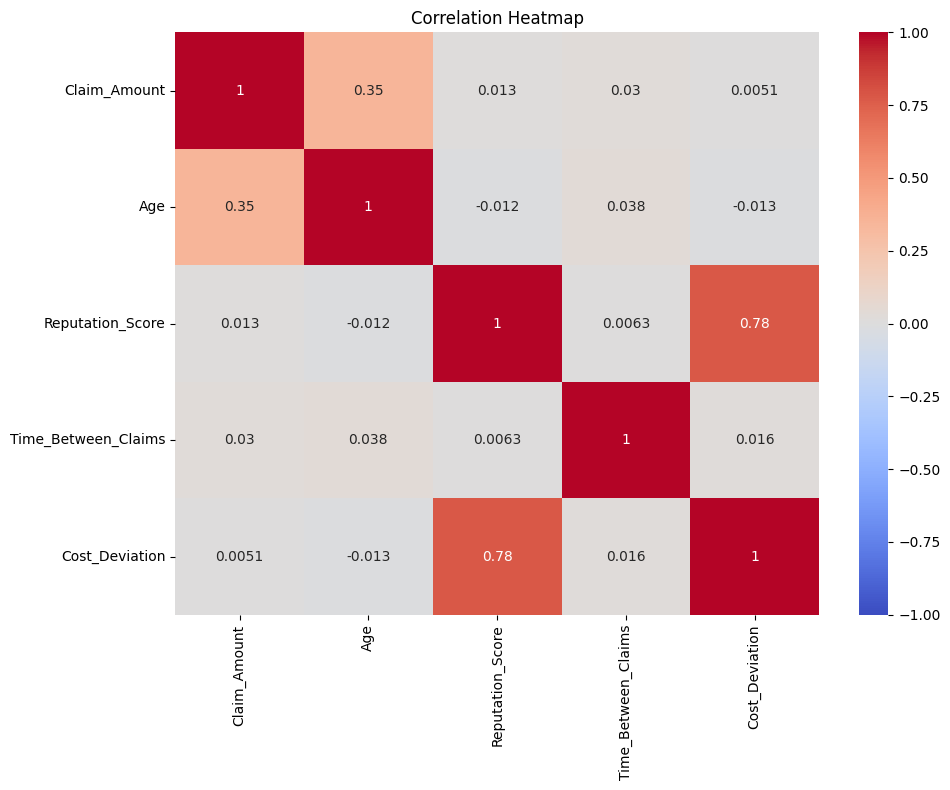

In [23]:
plt.figure(figsize=(10, 8))
corr = data[['Claim_Amount', 'Age', 'Reputation_Score', 'Time_Between_Claims', 'Cost_Deviation']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [24]:
corr

,Claim_Amount,Age,Reputation_Score,Time_Between_Claims,Cost_Deviation
Claim_Amount,1.000000,0.345297,0.012950,0.030079,0.005087
Age,0.345297,1.000000,-0.012436,0.038135,-0.013492
Reputation_Score,0.012950,-0.012436,1.000000,0.006285,0.777118
Time_Between_Claims,0.030079,0.038135,0.006285,1.000000,0.016259
Cost_Deviation,0.005087,-0.013492,0.777118,0.016259,1.000000


# Anomaly Detection

Used Z-Score(Standard deviation Method) and IQR (Interquartile Range) to idenfy the outliers

In [25]:
from scipy.stats import zscore

data['Claim_Amount_Z'] = zscore(data['Claim_Amount'])

In [26]:
data['outlier_Z_score']= np.where(data['Claim_Amount_Z'].abs()>3,1,0)
# Display anomalies
print(f"Anomalies based on Z-score:\n{data['outlier_Z_score']}")


Anomalies based on Z-score:
0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: outlier_Z_score, Length: 5000, dtype: int64


In [27]:
Q1 = data['Claim_Amount'].quantile(0.25)
Q3 = data['Claim_Amount'].quantile(0.75)

IQR = Q3 - Q1

data['outlier_iqr'] = np.where((data['Claim_Amount'] < (Q1 - 1.5 * IQR)) | 
                               (data['Claim_Amount'] > (Q3 +1.5 *IQR)),1,0)
data['outlier_iqr']

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: outlier_iqr, Length: 5000, dtype: int64

In [28]:
data['Claim_Amount'] > 100000

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Name: Claim_Amount, Length: 5000, dtype: bool

* Claim_Amount_Z: Z-Score for Claim_Amount to identify outliers.
* Outlier_Z_Score: Flag (1 or 0) indicating whether the row is an outlier based on Z-Score.
* Outlier_IQR: Flag (1 or 0) indicating whether the row is an outlier based on the IQR method.
* Outlier_Flag: Combined flag for outliers, where 1 indicates an outlier (from either Z-Score or IQR), and 0 indicates normal.
* Is_Outlier: A simple label ('Yes' or 'No') for whether the row is an outlier.

In [29]:
data['Outlier_Flag'] = data['outlier_Z_score'] | data['outlier_iqr']
data['Is_Outlier'] = np.where(data['Outlier_Flag'] ==1, "Yes", 'No')

# Now your dataframe has outlier flags for each row
print(data[['Claim_ID', 'Claim_Amount', 'Claim_Amount_Z', 'outlier_Z_score', 'outlier_iqr', 'Outlier_Flag', 'Is_Outlier']].head())


   Claim_ID  Claim_Amount  Claim_Amount_Z  outlier_Z_score  outlier_iqr  \
0  cef37d58  59615.656143        0.565132                0            0   
1  11a7a4d8  10514.185793       -0.338404                0            0   
2  34dcf268      0.000000       -0.531880                0            0   
3  aad703b1  29974.343159        0.019690                0            0   
4  6f0bfe8d      0.000000       -0.531880                0            0   

   Outlier_Flag Is_Outlier  
0             0         No  
1             0         No  
2             0         No  
3             0         No  
4             0         No  


In [30]:
data.iloc[:10,:16]

,Claim_ID,Claim_Amount,Procedure_Code,Service_Date,Claim_Status,Patient_ID,Age,Gender,Location,Medical_History,Insurance_Plan,Provider_ID,Specialization,Provider_Location,Reputation_Score,Payment_Method
0,cef37d58,59615.656143,99282,2024-01-24,Approved,20882,66,Male,South Patrickview,Hypertension,Basic,60441,Emergency Medicine,South Amandaborough,3.86,Debit Card
1,11a7a4d8,10514.185793,11042,2020-03-04,Under Review,98919,62,Male,South Christinaville,None,Premium,17172,Cardiology,Lake Jennifer,2.44,Cash
2,34dcf268,0.000000,99283,2024-01-02,Denied,25694,47,Female,Allenland,Diabetes,Standard,47939,Orthopedics,West Jason,4.40,Debit Card
3,aad703b1,29974.343159,12001,2023-03-15,Under Review,94814,76,Female,Port Susanbury,None,Standard,18723,Dermatology,Lake Jacqueline,2.69,Cash
4,6f0bfe8d,0.000000,99382,2021-06-02,Denied,23811,78,Male,Myersburgh,None,Premium,34145,Emergency Medicine,North Alexview,4.40,Credit Card
5,0e7f62c0,0.000000,99282,2024-12-19,Denied,27986,22,Female,North Andreaborough,Diabetes,Standard,88932,Emergency Medicine,West Alison,3.95,Cash
6,bc1860de,0.000000,43235,2024-09-11,Denied,59414,85,Female,South Frederick,Asthama,Standard,67091,Orthopedics,South Patriciaberg,1.12,Cash
7,734d6758,34773.604723,43235,2022-07-09,Under Review,47642,78,Female,Lake Dana,Asthama,Basic,73999,Orthopedics,Lake Scott,4.22,Insurance
8,a0c0d79b,0.000000,99282,2020-11-26,Denied,29531,23,Male,North Peter,Diabetes,Standard,60649,Dermatology,East Jorge,3.18,Debit Card
9,24d852ee,0.000000,99283,2023-03-14,Denied,40306,71,Male,West Gregorystad,Diabetes,Standard,80131,Cardiology,Kellyfort,4.65,Debit Card


In [31]:
from sklearn.cluster import DBSCAN

# Use Claim_Amount and Age as features for DBSCAN clustering
X_clustering = data[['Claim_Amount', 'Age']]

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.8, min_samples=10)
data['Cluster'] = dbscan.fit_predict(X_clustering)

# -1 in the 'Cluster' column indicates outliers
print(data[['Claim_ID', 'Claim_Amount', 'Age', 'Cluster']].head())


   Claim_ID  Claim_Amount  Age  Cluster
0  cef37d58  59615.656143   66       -1
1  11a7a4d8  10514.185793   62       -1
2  34dcf268      0.000000   47        0
3  aad703b1  29974.343159   76       -1
4  6f0bfe8d      0.000000   78        1


In [32]:
max(data['Claim_Amount'])

820962.6351089684

# Feature Engineering

### High Claim Amount

In [33]:
 # Create a flag for high claim amounts
data['High_Claim_Amount'] = (data['Claim_Amount'] >50000).astype(int)
data['High_Claim_Amount'].value_counts()

High_Claim_Amount
0    3708
1    1292
Name: count, dtype: int64

Interpretation:
* 1275 rows have a high claim amount (Claim_Amount > 50,000).
* 3725 rows have a normal claim amount (Claim_Amount <= 50,000).

### Suspicious Timing

In [34]:
data['Suspicious_Timing'] = (data['Time_Between_Claims'] <= 7).astype('int')
data['Suspicious_Timing'].value_counts()


Suspicious_Timing
0    4646
1     354
Name: count, dtype: int64

* 321 indicates that the claim is considered suspicious because it was made within 7 days of the previous claim. The count is 327.
* 0 indicates that the claim is not suspicious, i.e., it was made after 7 days of the previous claim. The count is 4673.

# Expected Claim Amount

In [41]:
# expected amount

data['expected_claim_amount'] = np.where(
    data['Claim_Amount'] >0,
    data['Claim_Amount'] * data['Cost_Deviation'],0
)

data['expected_claim_amount'] 

0       154568.120683
1        21436.697408
2            0.000000
3        42882.390391
4            0.000000
            ...      
4995    227601.821607
4996         0.000000
4997         0.000000
4998         0.000000
4999         0.000000
Name: expected_claim_amount, Length: 5000, dtype: float64

In [42]:
print(data[['Claim_Amount', 'Cost_Deviation', 'expected_claim_amount']].head())

   Claim_Amount  Cost_Deviation  expected_claim_amount
0  59615.656143        2.592744          154568.120683
1  10514.185793        2.038836           21436.697408
2      0.000000        1.830989               0.000000
3  29974.343159        1.430637           42882.390391
4      0.000000        2.798629               0.000000


# # Group by 'Patient_ID' and calculate the number of claims and the gap between claims

In [36]:
# Group by 'Patient_ID' and calculate the number of claims and the gap between claims
patient_claims = data.groupby('Patient_ID').agg(
    claim_count = ('Claim_Amount', 'count'),
    avg_gap = ('Time_Between_Claims', 'mean')).reset_index()

print(patient_claims)

      Patient_ID  claim_count  avg_gap
0          10000            2    215.5
1          10004            1     19.0
2          10019            1    308.0
3          10022            1     27.0
4          10047            1    159.0
...          ...          ...      ...
4856       99889            1    114.0
4857       99921            1     80.0
4858       99923            1    172.0
4859       99934            1     36.0
4860       99956            1    316.0

[4861 rows x 3 columns]


<Axes: xlabel='avg_gap', ylabel='Count'>

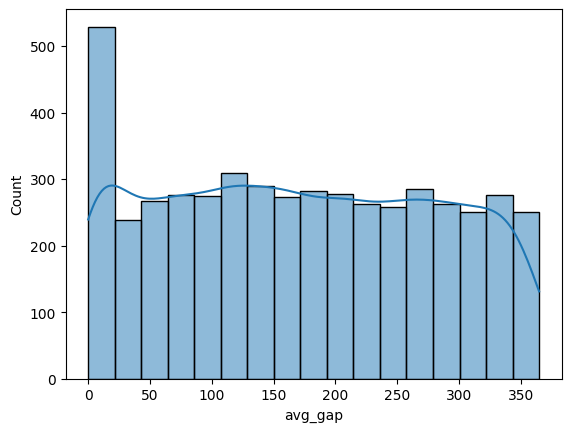

In [37]:
sns.histplot(data = patient_claims, x= 'avg_gap', kde=True)
# sns.kdeplot

In [38]:
# maximum claims 
max_n = patient_claims.loc[patient_claims['claim_count'].idxmax(), 'Patient_ID']
a =patient_claims[patient_claims['Patient_ID'] == max_n]
a

,Patient_ID,claim_count,avg_gap
1967,46416,3,123.666667


# Merge aggregated table with original table

In [39]:
data = data.merge(patient_claims, on='Patient_ID', how = 'left')

In [40]:
more_claim_id = a.iloc[:,0]
data[data['Patient_ID'].isin(more_claim_id)]

,Claim_ID,Claim_Amount,Procedure_Code,Service_Date,Claim_Status,Patient_ID,Age,Gender,Location,Medical_History,...,Fraudulent,Claim_Amount_Z,outlier_Z_score,outlier_iqr,Outlier_Flag,Is_Outlier,Cluster,High_Claim_Amount,claim_count,avg_gap
2579,a781b3ef,5026.936582,99282,2022-02-28,Approved,46416,44,Female,Danielbury,None,...,0,-0.421839,0,0,0,No,-1,0,3,123.666667
2910,07995500,109967.569002,99284,2022-05-15,Under Review,46416,70,Female,Paulshire,Hypertension,...,0,1.306307,0,0,0,No,-1,1,3,123.666667
4650,60068537,3624.410279,71020,2021-12-12,Approved,46416,32,Female,Millerview,Asthama,...,0,-0.444935,0,0,0,No,-1,0,3,123.666667


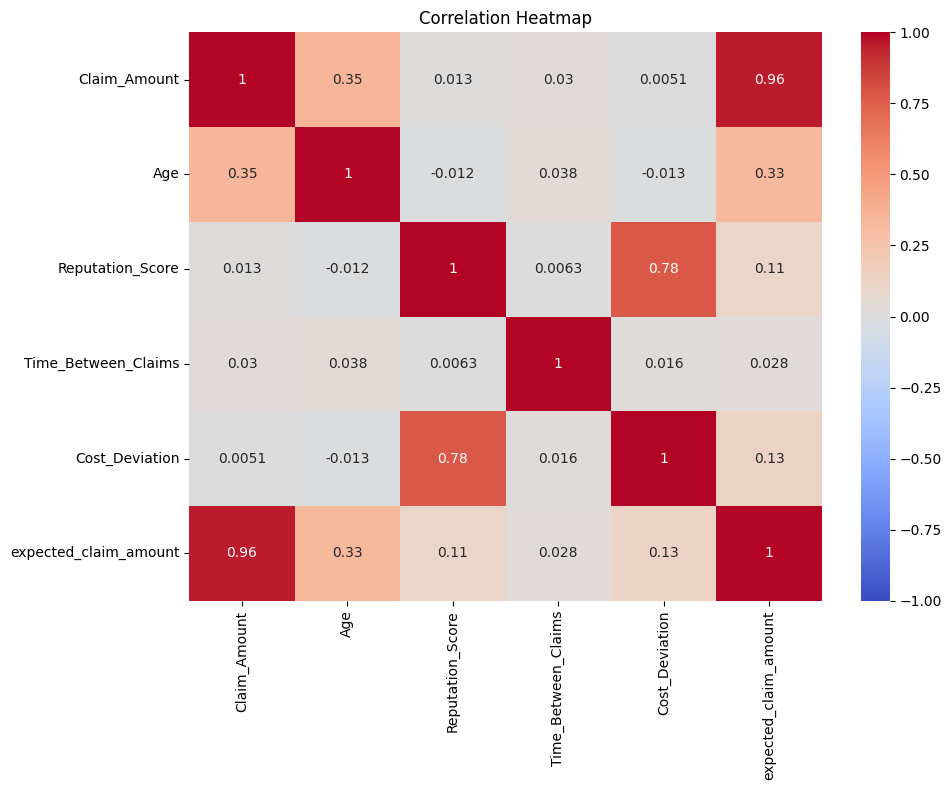

In [43]:
plt.figure(figsize=(10, 8))
corr = data[['Claim_Amount', 'Age', 'Reputation_Score', 'Time_Between_Claims', 'Cost_Deviation','expected_claim_amount']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [45]:
# ! pip install tensorflow

In [46]:
data.columns

Index(['Claim_ID', 'Claim_Amount', 'Procedure_Code', 'Service_Date',
       'Claim_Status', 'Patient_ID', 'Age', 'Gender', 'Location',
       'Medical_History', 'Insurance_Plan', 'Provider_ID', 'Specialization',
       'Provider_Location', 'Reputation_Score', 'Payment_Method',
       'Time_Between_Claims', 'Cost_Deviation', 'Suspicious_Timing',
       'Duplicate_Claims', 'Fraudulent', 'Claim_Amount_Z', 'outlier_Z_score',
       'outlier_iqr', 'Outlier_Flag', 'Is_Outlier', 'Cluster',
       'High_Claim_Amount', 'expected_claim_amount'],
      dtype='object')